# Exercises

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot. Plotting the temporal trace will allow us to see the calcium transient dynamic, if a pixel belonging to a neuron is selected. 

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are chosen from an active neuron, you will be able to see the calcium transient dynamic. 

**B.** Temporal statistics
 * For the selected pixels, plot the histogram of pixel value. What are the differences in different regions?, and how can that help to differ a neuron from the background?

* If we can already see the calcium traces from the row data, why do we need to do a segmentation of the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces? 

<font color='blue'>Raw data isn't enough because we can not be sure if the trace comes from a single neuron or it's a sum of two nearby neurons. The boundaries can easily overlap. there is also the possibility of having a neuron over another,on the vertical axis and therefore it is also impossible to distinguish them.</font>

In [1]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pickle
import psutil
from pathlib import Path
import os

# CaImAn funtions and objects
import caiman as cm
from caiman.motion_correction import MotionCorrect, high_pass_filter_space
from caiman.source_extraction.cnmf import params as params
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF

import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import auxiliary_functions as aux


import seaborn as sns
sns.set_theme(context='notebook',style='white',font_scale=1.5)


C:\Users\orfea\mambaforge\envs\neuranal\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\orfea\mambaforge\envs\neuranal\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\orfea\mambaforge\envs\neuranal\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\orfea\mambaforge\envs\neuranal\lib\site-packages\ten

In [2]:
input_tif_file_path_FOV = 'data/calcium_video.tif'   
input_tif_file_path = 'data/caiman_video_trial_0.tif'
FOV = cm.load(input_tif_file_path_FOV)
original_movie=cm.load(input_tif_file_path)
mean_image = cm.summary_images.mean_image(input_tif_file_path)
correlation_image,pnr_image = cm.summary_images.correlation_pnr(original_movie,swap_dim=False)

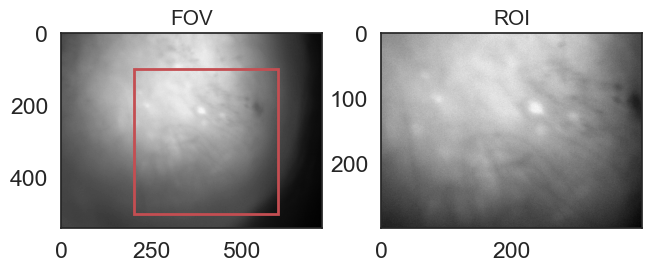

In [3]:
aux.plot_FOV(FOV_file = input_tif_file_path_FOV , ROI_file = input_tif_file_path)

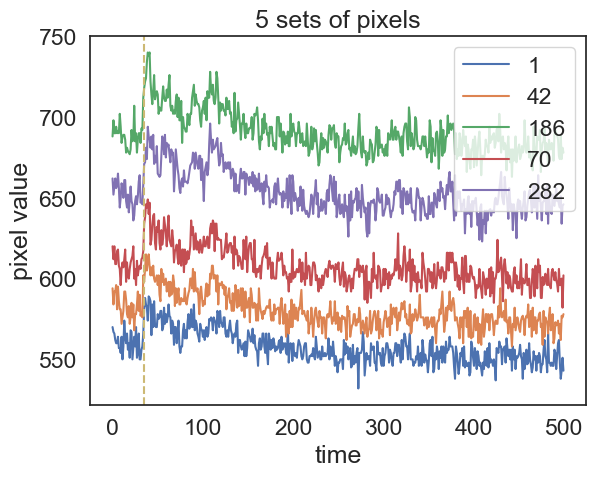

In [41]:
area=[1,42,186,70,282]
for i,j in enumerate(area):
    plt.plot(original_movie[:,i,j],label=j)
    plt.xlabel('time')
    plt.ylabel('pixel value')
    plt.title('5 sets of pixels')    
plt.legend() 
plt.axvline(35,linestyle='dashed',color='y')



<font color='blue'>In the graph above we can see an increase in pixel value around the dashed line in every set of pixels that we suspect is a result of neuron activity. After that, we can see a drop and in some cases another "peak" like the 282 labeled line. We could say the drop resembles an image such as the calcium tranisent we see in other graphs.</font>